### Loss Functions
| ** Classification ** | ** Regression ** |
| -------------------- | ---------------- |
| Log Loss | Mean Square Error/Quadratic Loss |
| Focal Loss | Mean Absolute Error |
| KL Divergence/Relative Entropy | Huber Loss/Smooth Mean Absolute Error |
| Exponential Loss | Log cosh Loss |
| Hinge Loss | Quantile Loss |







## Regression Losses

In [1]:
#matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

** Regression: Mean Square Error **

In [7]:
def mse(y, y_hat):
    return np.sum((y - y_hat)**2)

In [8]:
y = np.repeat(100, 10000)
y_hat = np.arange(-10000, 10000, 2)
loss_mse = [mse(y[i], y_hat[i]) for i in range(len(y))]

Text(0.5,0,'Predictions')

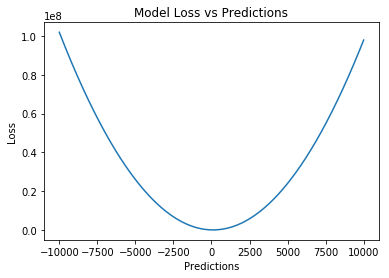

In [9]:
plt.figure() 
plt.plot(y_hat, loss_mse)
plt.title('Model Loss vs Predictions')
plt.ylabel('Loss')
plt.xlabel('Predictions')

Text(0.5,0,'Predictions')

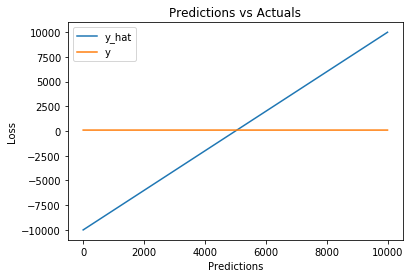

In [10]:
plt.figure() 
plt.plot(y_hat)
plt.plot(y)
plt.legend(['y_hat', 'y'], loc='best')
plt.title('Predictions vs Actuals')
plt.ylabel('Loss')
plt.xlabel('Predictions')

** Regression: Mean Absolute Error (MAE/L1 Loss) **

In [12]:
def mae(y, y_hat):
    return np.sum(np.abs(y - y_hat))

In [15]:
loss_mae = [mae(y[i], y_hat[i]) for i in range(len(y))]

Text(0.5,0,'Predictions')

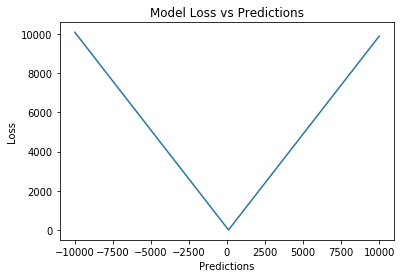

In [16]:
plt.figure() 
plt.plot(y_hat, loss_mae)
plt.title('Model Loss vs Predictions')
plt.ylabel('Loss')
plt.xlabel('Predictions')

** Regression: Smooth Mean Absolute Error/Huber Loss **

In [25]:
def smooth_mae(y, y_hat, delta):
    smooth_loss = np.where(
        np.abs(y - y_hat) < delta, 
        0.5 * ((y - y_hat)**2),
        delta * np.abs(y - y_hat) - 0.5 * (delta**2)
    )
    return np.sum(smooth_loss)

In [26]:
y = np.repeat(0, 1000)
y_hat = np.arange(-10, 10, 0.02)
delta = [0.1, 1, 10]
loss_huber = [[smooth_mae(y[i], y_hat[i], q) for i in range(len(y))] for q in delta]


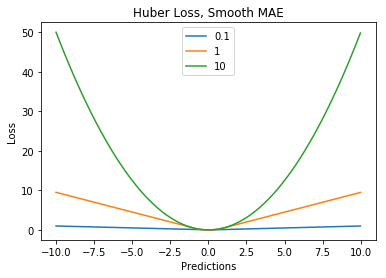

In [29]:
plt.figure()
for i in range(len(delta)):
    plt.plot(y_hat, loss_huber[i], label=delta[i])
plt.xlabel('Predictions')
plt.ylabel('Loss')
plt.title('Huber Loss, Smooth MAE')
plt.legend()


** Log cosh Loss **

In [31]:
def log_cosh(y, y_hat):
    loss_lcosh = np.log(np.cosh(y_hat - y))
    return np.sum(loss_lcosh)

In [32]:
y = np.repeat(0, 1000)
y_hat = np.arange(-10, 10, 0.02)

loss_lcosh = [log_cosh(y_hat[i], y[i]) for i in range(len(y))]

Text(0.5,1,'Log-Cosh Loss vs Predictions')

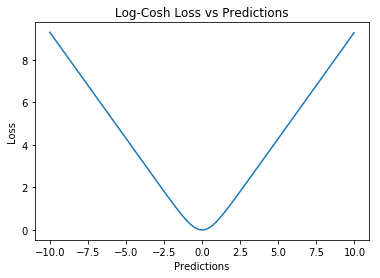

In [33]:
plt.figure()
plt.plot(y_hat, loss_lcosh)
plt.xlabel('Predictions')
plt.ylabel('Loss')
plt.title('Log-Cosh Loss vs Predictions')

** Quantile Loss **

In [36]:
def loss_quant(y, y_hat, theta):
    quant_loss = np.where(
        y >= y_hat, 
        theta * (np.abs(y - y_hat)), 
        (1 - theta) * (np.abs(y - y_hat))
    )
    return np.sum(quant_loss)

In [37]:
y = np.repeat(0, 1000)
y_hat = np.arange(-10, 10, 0.02)
quantiles = [0.25, 0.5, 0.75]
loss_quantiles = [[loss_quant(y[i], y_hat[i], q) for i in range(len(y))] for q in quantiles]


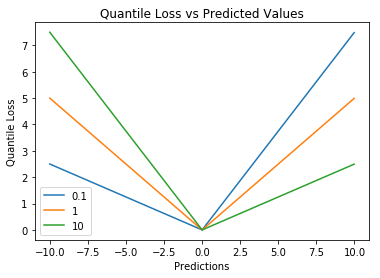

In [39]:
plt.figure()
for i in range(len(quantiles)):
    plt.plot(y_hat, loss_quantiles[i], label=delta[i])
plt.xlabel('Predictions')
plt.ylabel('Quantile Loss')
plt.title('Quantile Loss vs Predicted Values')
plt.legend()

In [ ]:
def rmse(y, y_hat):
    return np.sum((y - y_hat)**2)/y.shape[0]

def mae(y, y_hat):
    return np.sum(np.abs(y - y_hat))/y.shape[0]

def mae_gk(y, y_hat):
    return np.abs(y - y_hat).mean()